In [245]:
import csv
import numpy as np

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

def process_data_with_keys(data, subject_names):
    subjects_data = {}
    for i, subject_name in enumerate(subject_names):
        subjects_data[subject_name] = np.array(data[i])
    return subjects_data


file_path = 'studentData.csv'
csv_data = read_csv_file(file_path)

num_students = 0
# Extract subject names
subject_names = csv_data[0][1:]
# Extract students' data
students_data = {}
for row in csv_data[1:]:
    subject_scores = []
    if row[0] != '':
        num_students +=1
        for col in row[1:]:
            if col == '':
                subject_scores.append(10)
            else:
                subject_scores.append(int(col))
        students_data[row[0]] = subject_scores

# Convert dictionary to numpy array
students_array = np.array(list(students_data.values()))

# Transpose the data
transposed_data = students_array.T

# Process the data with keys
subjects_data = process_data_with_keys(transposed_data, subject_names)

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Function to pair subjects together with the least amount of clashes
def pair_subjects_with_least_clashes(subjects_data):
    min_clashes = float('inf')
    min_non_selected = float('inf')
    best_pair = None
    for subject_name, subject_data in subjects_data.items():
        clashes_report = report_clashes_for_subject(subject_name, subjects_data)
        for other_subject_name, (clashes, non_selected) in clashes_report.items():
            if clashes < min_clashes or (clashes == min_clashes and non_selected < min_non_selected):
                min_clashes = clashes
                min_non_selected = non_selected
                best_pair = (subject_name, other_subject_name)
    return best_pair, min_clashes, min_non_selected

# Function to create subject blocks
def create_subject_blocks(subjects_data):
    blocks = []
    remaining_subjects = list(subjects_data.keys())
    while remaining_subjects:
        best_pair, min_clashes, min_non_selected = pair_subjects_with_least_clashes({k: subjects_data[k] for k in remaining_subjects})
        blocks.append((best_pair, min_clashes, min_non_selected))
        remaining_subjects.remove(best_pair[0])
        remaining_subjects.remove(best_pair[1])
    return blocks

# Create subject blocks
subject_blocks = create_subject_blocks(subjects_data)

# Display subject blocks with clashes and non-selected count
print("Subject Blocks:")
total_success = 0
total_clash = 0
total_non_selected = 0
for i, (block, clashes, non_selected_count) in enumerate(subject_blocks, 1):
    success = num_students - clashes - non_selected_count
    subject1, subject2 = block
    total_success += success / num_students * 100
    total_clash += clashes / num_students * 100
    total_non_selected += non_selected_count / num_students * 100
    print(f"Block {i}: {subject1} & {subject2}, Success: {success} {success / num_students * 100:.2f}%, Clashes: {clashes} {clashes / num_students * 100:.2f}%, Non-selected count: {non_selected_count} {non_selected_count / num_students * 100:.2f}%")

print("Average Success: ", round(total_success / len(subject_blocks), 2), "%")
print("Average Clash: ", round(total_clash / len(subject_blocks), 2), "%")
print("Average Non-selected: ", round(total_non_selected / len(subject_blocks), 2), "%")


Subject Blocks:
Block 1: English & Mandarin, Success: 12 92.31%, Clashes: 0 0.00%, Non-selected count: 1 7.69%
Block 2: Bio & CS, Success: 9 69.23%, Clashes: 4 30.77%, Non-selected count: 0 0.00%
Block 3: History & ICT, Success: 9 69.23%, Clashes: 4 30.77%, Non-selected count: 0 0.00%
Block 4: Chem & Malay, Success: 6 46.15%, Clashes: 7 53.85%, Non-selected count: 0 0.00%
Block 5: Physics & GP, Success: 1 7.69%, Clashes: 12 92.31%, Non-selected count: 0 0.00%
Average Success:  56.92 %
Average Clash:  41.54 %
Average Non-selected:  1.54 %


In [229]:
import numpy as np

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
    return clashes_report

# Generate and print clashes report for each subject
for subject_name, subject_data in subjects_data.items():
    clashes_report = report_clashes_for_subject(subject_name, subjects_data)
    if clashes_report:
        print(f"For {subject_name}:")
        for other_subject, (clashes, non_selected) in clashes_report.items():
            print(f"- {clashes} clashed and {non_selected} not-selected with {other_subject}.")
    else:
        print(f"No clashes for {subject_name}.")


For Subject 1:
- 5 clashed and 1 not-selected with Subject 2.
- 6 clashed and 0 not-selected with Subject 3.
- 10 clashed and 0 not-selected with Subject 4.
- 9 clashed and 0 not-selected with Subject 5.
- 6 clashed and 1 not-selected with Subject 6.
- 7 clashed and 1 not-selected with Subject 7.
- 7 clashed and 0 not-selected with Subject 8.
- 10 clashed and 2 not-selected with Subject 9.
- 0 clashed and 1 not-selected with Subject 10.
For Subject 2:
- 5 clashed and 1 not-selected with Subject 1.
- 5 clashed and 2 not-selected with Subject 3.
- 7 clashed and 0 not-selected with Subject 4.
- 6 clashed and 0 not-selected with Subject 5.
- 4 clashed and 2 not-selected with Subject 6.
- 4 clashed and 1 not-selected with Subject 7.
- 4 clashed and 0 not-selected with Subject 8.
- 6 clashed and 1 not-selected with Subject 9.
- 1 clashed and 5 not-selected with Subject 10.
For Subject 3:
- 6 clashed and 0 not-selected with Subject 1.
- 5 clashed and 2 not-selected with Subject 2.
- 9 clashed

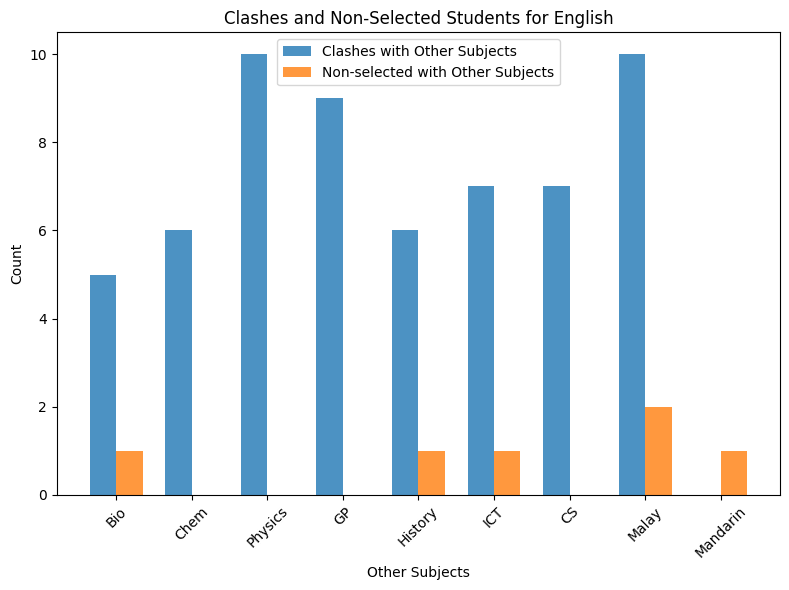

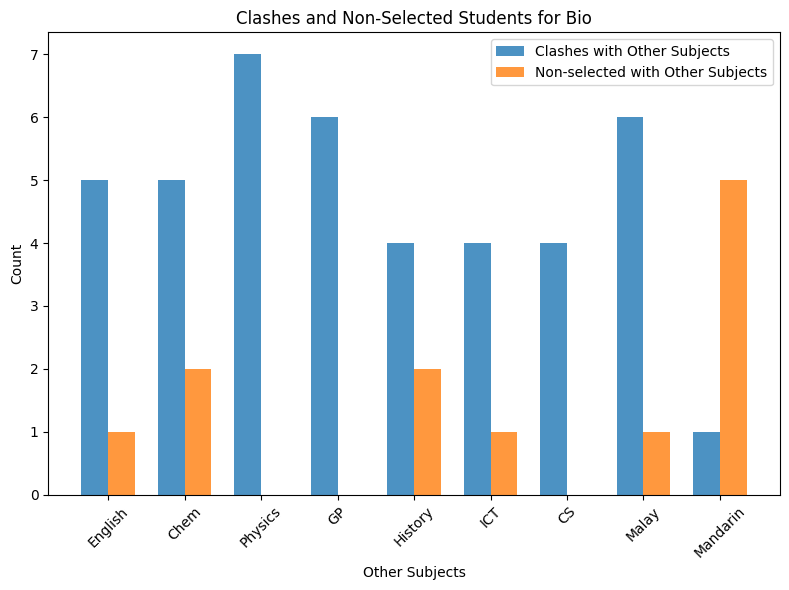

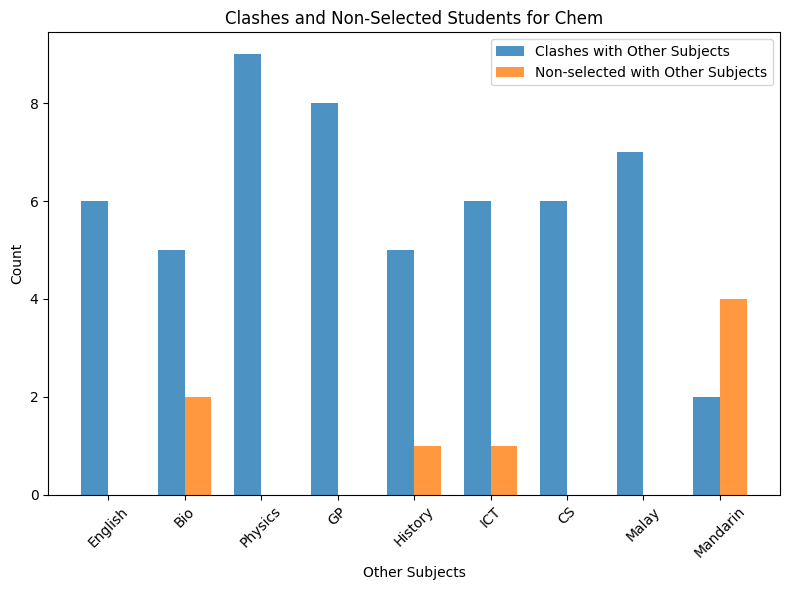

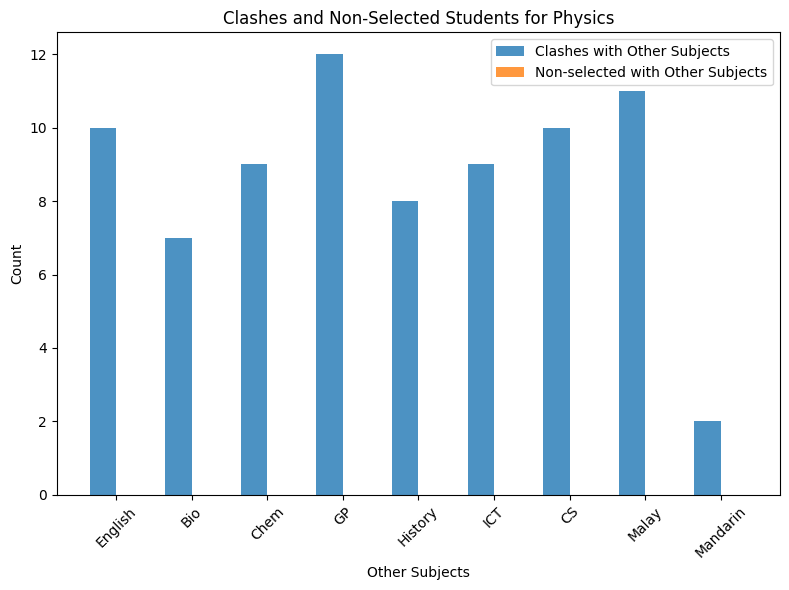

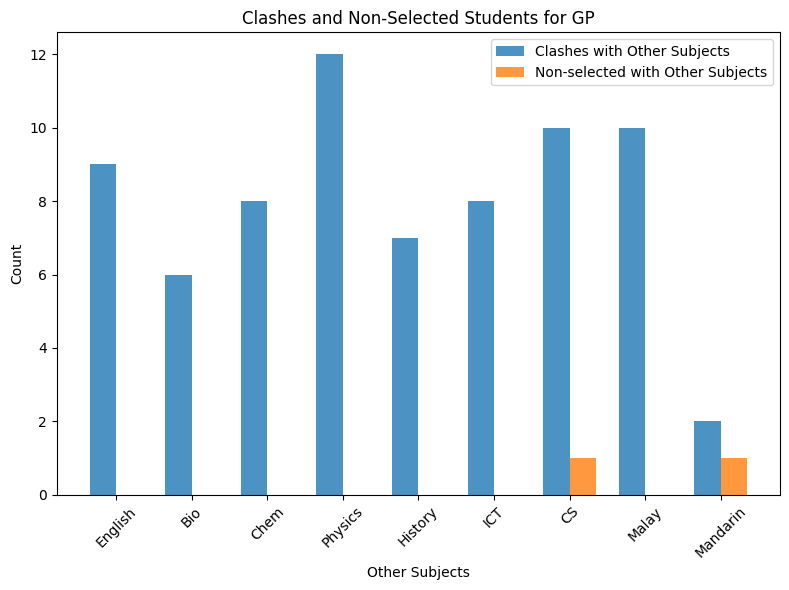

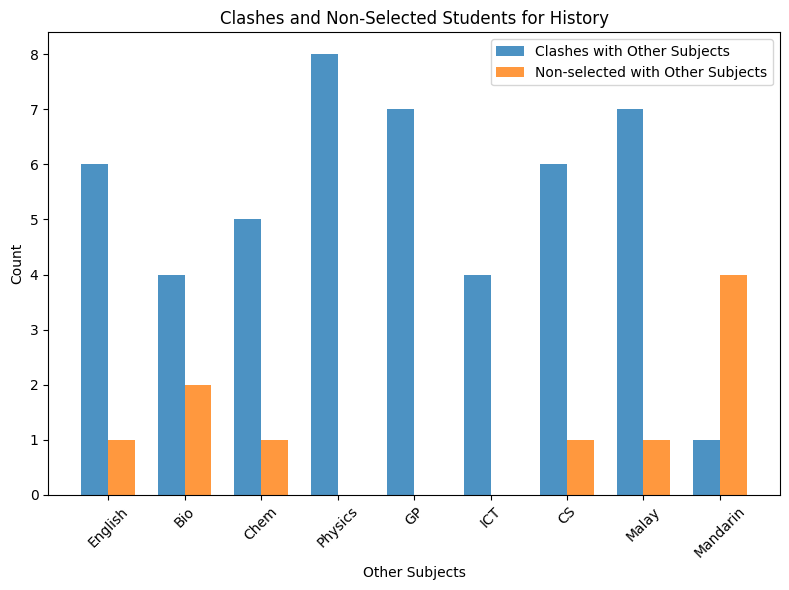

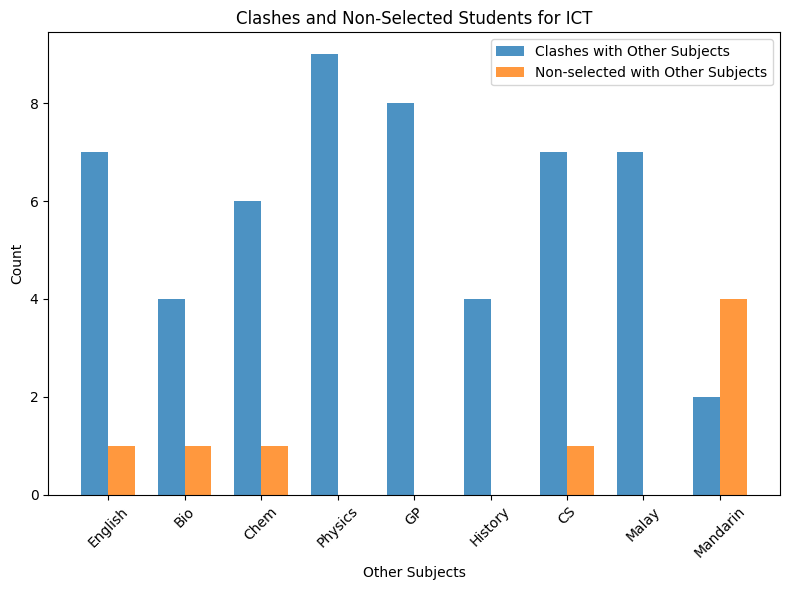

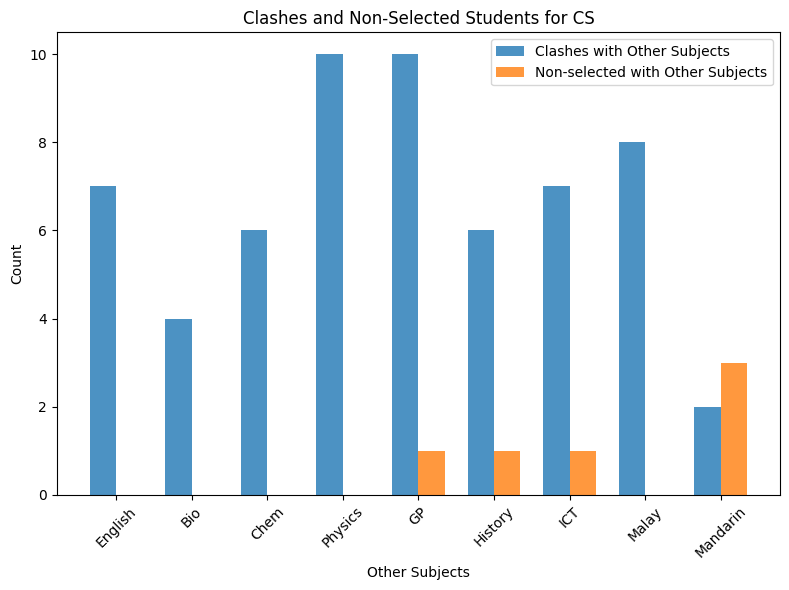

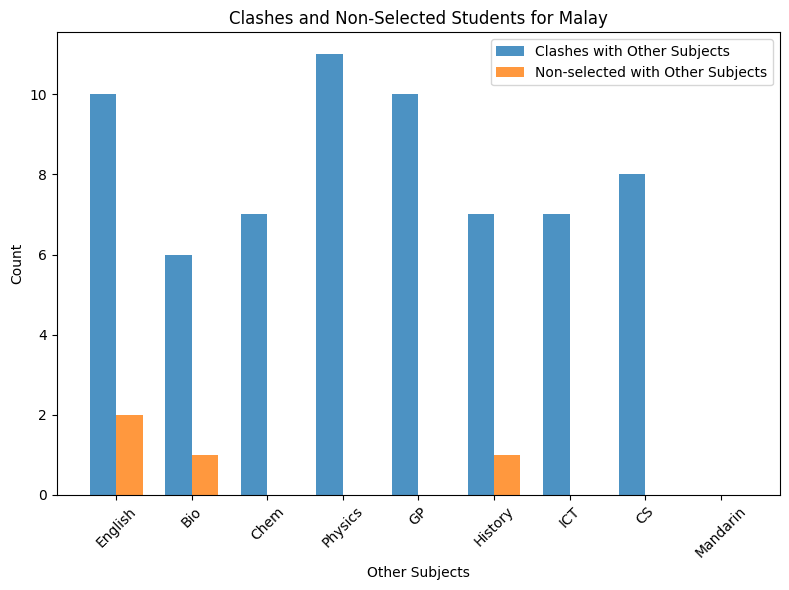

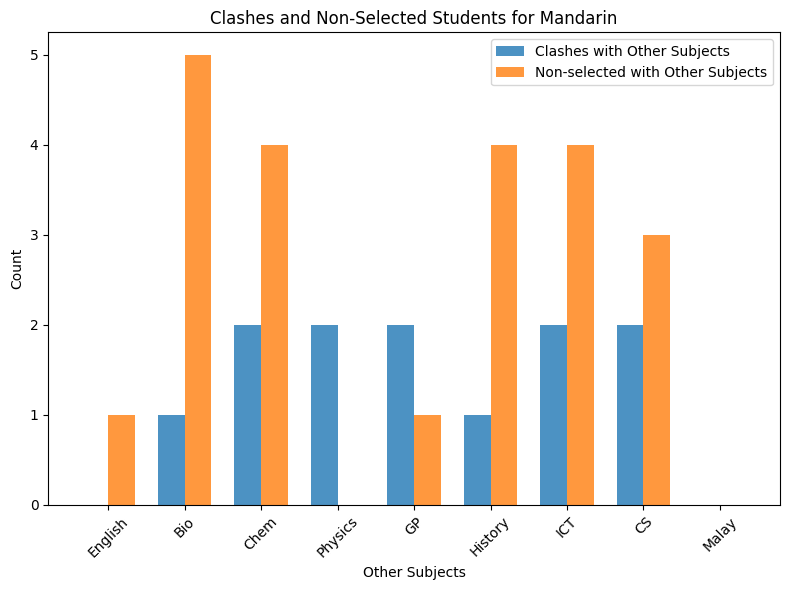

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# Function to count clashes between two subjects
def count_clashes(subject1_data, subject2_data):
    clashes = np.sum((subject1_data <= 7) & (subject2_data <= 7))
    non_selected = np.sum((subject1_data == 10) & (subject2_data == 10))
    return clashes, non_selected

# Function to report clashes between a subject and all other subjects
def report_clashes_for_subject(subject_name, subjects_data):
    clashes_report = {}
    subject_data = subjects_data[subject_name]
    for other_subject_name, other_subject_data in subjects_data.items():
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, other_subject_data)
            if clashes > 0 or non_selected > 0:
                clashes_report[other_subject_name] = (clashes, non_selected)
            else:
                # Add zero count for subjects with no clashes or non-selected students
                clashes_report[other_subject_name] = (0, 0)
    return clashes_report

# Generate data for plotting
subject_names = list(subjects_data.keys())
for subject_name in subject_names:
    clashes_data = []
    non_selected_data = []
    subject_data = subjects_data[subject_name]
    for other_subject_name in subject_names:
        if other_subject_name != subject_name:
            clashes, non_selected = count_clashes(subject_data, subjects_data[other_subject_name])
            clashes_data.append(clashes)
            non_selected_data.append(non_selected)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(clashes_data))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, clashes_data, bar_width, alpha=opacity, label=f'Clashes with Other Subjects')
    rects2 = plt.bar(index + bar_width, non_selected_data, bar_width, alpha=opacity, label=f'Non-selected with Other Subjects')

    plt.xlabel('Other Subjects')
    plt.ylabel('Count')
    plt.title(f'Clashes and Non-Selected Students for {subject_name}')
    plt.xticks(index + bar_width / 2, [subj_name for subj_name in subject_names if subj_name != subject_name], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


Things to do

- Count popular subject
- Check subject with other subject and count with the least clash